In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
kn = KNeighborsRegressor()
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('D:/ds/avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are total 18249 rows and 14 columns in the dataset. Unnamed is dummy data and will be removed. Date, type and region need to be encoded properly. Values are non-null - will have to check for 0 values. 

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [5]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [6]:
df['region'].value_counts()

Nashville              338
Orlando                338
Boise                  338
Plains                 338
Denver                 338
Syracuse               338
Chicago                338
Louisville             338
Houston                338
Tampa                  338
Spokane                338
Jacksonville           338
HartfordSpringfield    338
HarrisburgScranton     338
NorthernNewEngland     338
West                   338
LosAngeles             338
SouthCentral           338
Northeast              338
Columbus               338
Portland               338
NewOrleansMobile       338
RaleighGreensboro      338
SanDiego               338
LasVegas               338
Southeast              338
Seattle                338
CincinnatiDayton       338
Boston                 338
BaltimoreWashington    338
RichmondNorfolk        338
PhoenixTucson          338
Sacramento             338
StLouis                338
DallasFtWorth          338
Midsouth               338
MiamiFtLauderdale      338
A

In [7]:
df['Date'].value_counts()

2015-05-24    108
2015-09-13    108
2016-08-07    108
2015-03-08    108
2017-07-02    108
             ... 
2015-03-22    108
2017-07-16    108
2017-06-25    107
2015-12-06    107
2017-06-18    107
Name: Date, Length: 169, dtype: int64

In [8]:
df['year'],df['month'],df['day'] = df.Date.dt.year, df.Date.dt.month, df.Date.dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Splitting date will give an insight into the fluctuations wrt Year, Month and Day, hence, allowing us to remove Date column.

In [9]:
df = df.drop('Date', axis = 1)

In [10]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df[['type', 'region']]:
    s1 = lenc.fit_transform(df[i])
    s1 = pd.DataFrame(s1)
    df[i] = s1
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [11]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [12]:
df['region'].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

Data is successfully encoded. Now, to the description

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


Data looks fairly normal with 0s not being in questionable locations. We can subset data of year as the data is only from 2015 to 2018.

In [14]:
df['year'] = df['year'] - 2014

In [15]:
df['Error'] = df['Total Bags'] - df['XLarge Bags'] - df['Small Bags'] - df['Large Bags']
df['Error'].value_counts()

 0.000000e+00    6592
 3.637979e-12     416
-3.637979e-12     406
-7.275958e-12     405
 7.275958e-12     395
                 ... 
 1.523404e-11       1
-3.353762e-12       1
 6.401990e-12       1
 7.003109e-11       1
-4.422418e-11       1
Name: Error, Length: 915, dtype: int64

The error is very miniscule between total and individual types of bags. We may remove total bags if there is a problem of multicollinearity. Data is ready for visualization and manipulation.

In [16]:
df = df.drop('Error', axis = 1)

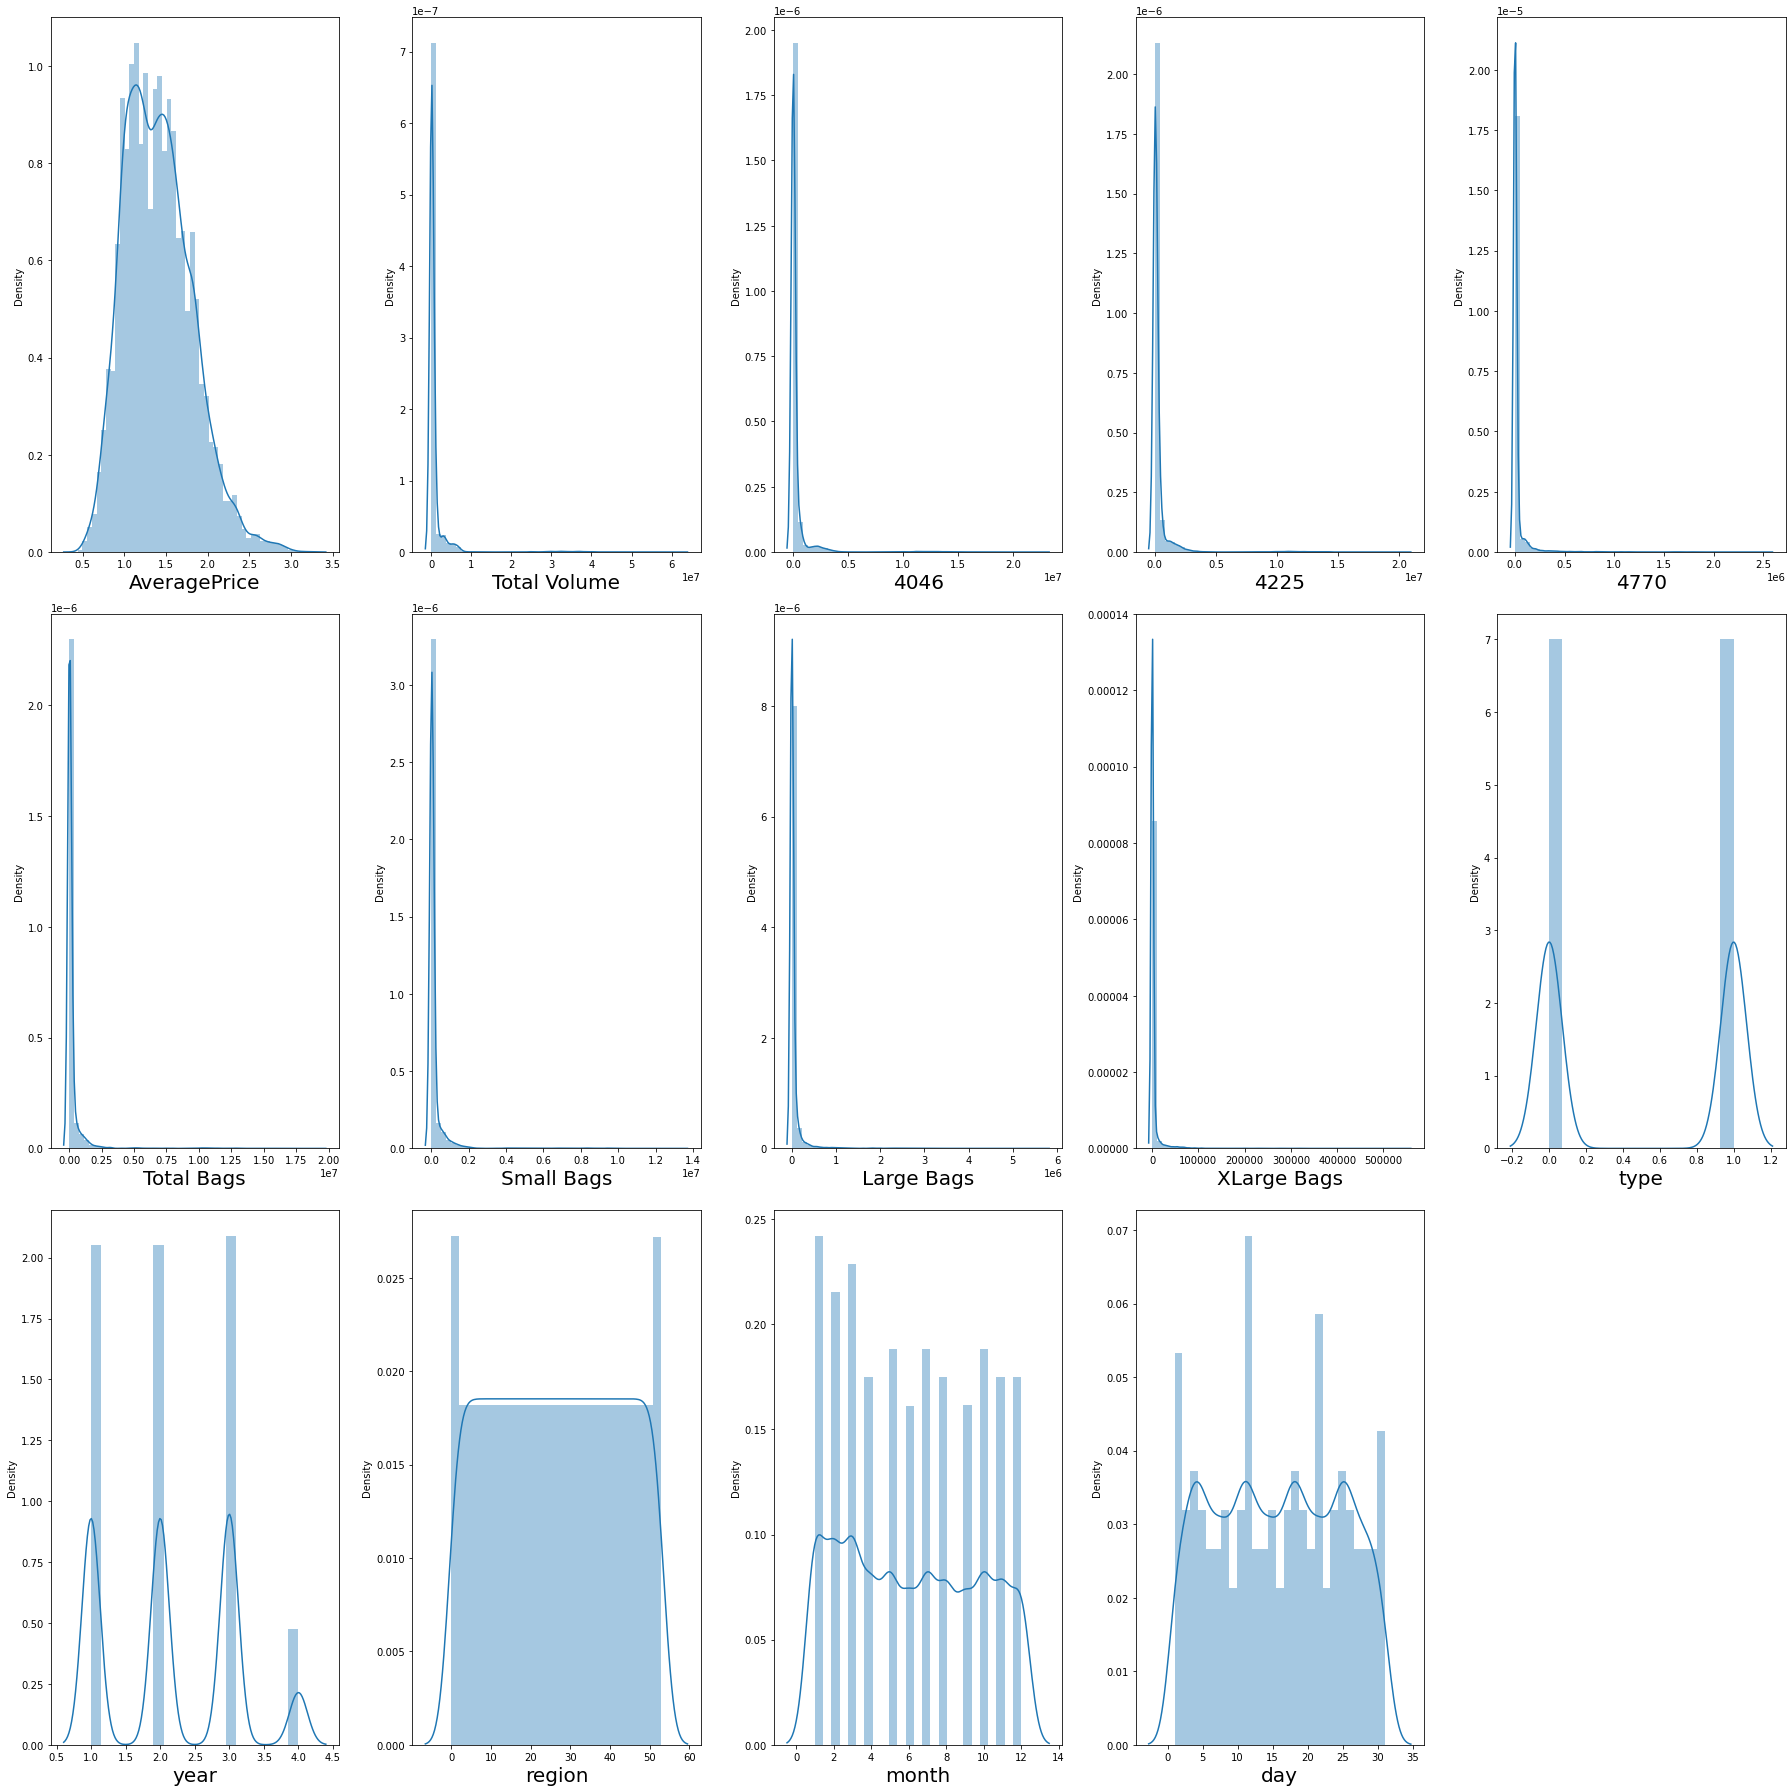

In [17]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in df:
    ax= plt.subplot(3,5,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

While the distribution of continuous data feels normal, There is skew that needs to be addressed - using z score and yeo-johnson methods. 

In [18]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
day              0.014310
dtype: float64

Skew is very high. Will have to fix using z score. 

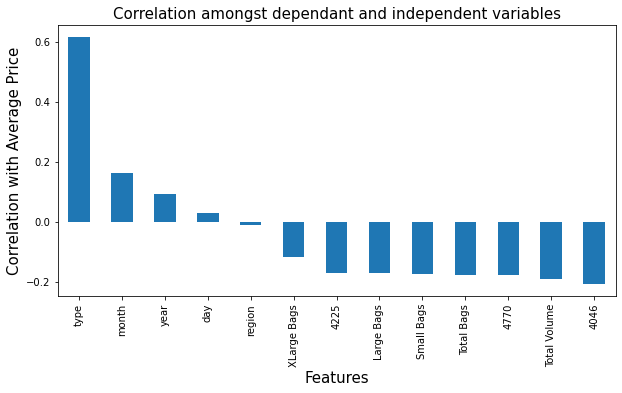

In [19]:
df2 = df.corr()
plt.figure(figsize=(10,5))
df2['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Average Price', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

There is low correlation with day, region. Very high correlation is observed with type.  

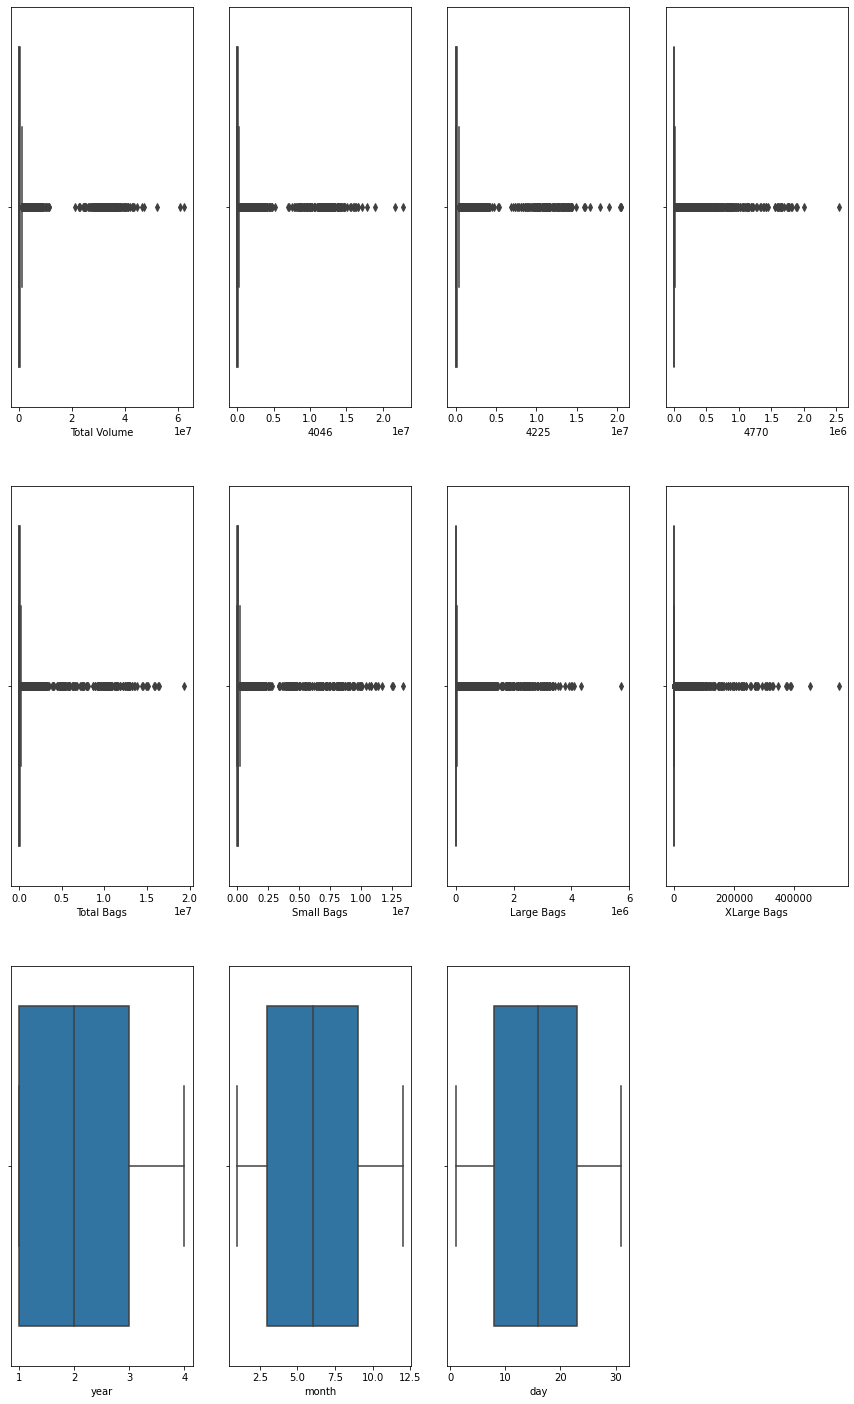

In [20]:
df1 = df.drop(['AveragePrice', 'region', 'type'], axis=1)
plt.figure(figsize=(15,25))
gr = 1
for c in df1:
    ax = plt.subplot(3, 4, gr)
    sns.boxplot(df1[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

There are outliers in all data apart from the year, month and day

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['AveragePrice', 'region', 'type'], axis=1)))
dfn=df[(z<2).all(axis=1)]
dfn.shape

(17334, 14)

Data loss is less than 5% which is acceptable

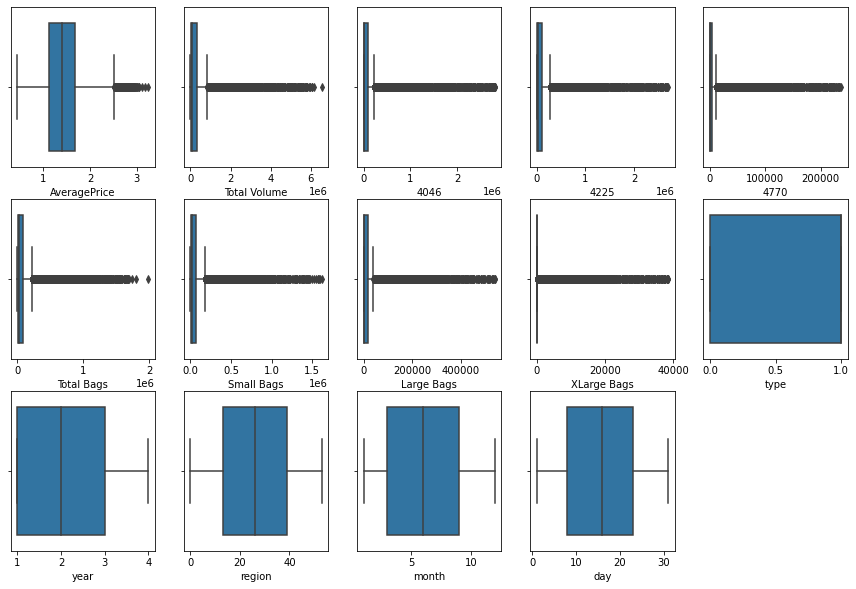

In [22]:
plt.figure(figsize=(15,10))
gr = 1
for c in dfn:
    ax = plt.subplot(3, 5, gr)
    sns.boxplot(dfn[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

There still are outliers and we don't have the liberty of more data loss. So, we'll fix it through yeo-joohnson's method. Also, with so many outliers, it shows that the curve is representing the increase in avocado sales over the years. The curve shows a growth pattern rather than a normal one.

In [23]:
dfn.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
count,17334.000000,1.733400e+04,1.733400e+04,1.733400e+04,17334.000000,1.733400e+04,1.733400e+04,17334.000000,17334.000000,17334.000000,17334.000000,17334.000000,17334.000000,17334.000000
mean,1.424464,3.466393e+05,1.123998e+05,1.257636e+05,8218.500648,1.002552e+05,7.706529e+04,22251.282092,938.643913,0.526249,2.140822,26.072113,6.213453,15.682012
std,0.401886,7.068366e+05,3.004208e+05,2.877751e+05,24903.083032,2.018911e+05,1.653241e+05,54782.836769,3557.296701,0.499325,0.938643,15.370427,3.544235,8.770020
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.120000,1.016080e+04,7.578050e+02,2.754102e+03,0.000000,4.554927e+03,2.479807e+03,92.375000,0.000000,0.000000,1.000000,13.000000,3.000000,8.000000
50%,1.400000,8.926713e+04,6.520735e+03,2.374239e+04,133.495000,3.384242e+04,2.210433e+04,2179.820000,0.000000,1.000000,2.000000,26.000000,6.000000,16.000000
75%,1.680000,3.459448e+05,8.533199e+04,1.087161e+05,4210.272500,9.321174e+04,7.226062e+04,16350.800000,39.992500,1.000000,3.000000,39.000000,9.000000,23.000000
max,3.250000,6.538336e+06,2.805888e+06,2.696732e+06,237030.330000,1.986021e+06,1.616257e+06,540435.370000,38457.000000,1.000000,4.000000,53.000000,12.000000,31.000000


In [24]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn.drop(['AveragePrice', 'region', 'type'], axis=1))
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn.drop(['AveragePrice', 'region', 'type'], axis=1).columns
dfn.index = dfn1.index
for i in dfn1:
    dfn[i] = dfn1[i]
    
dfn.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
count,17334.000000,1.733400e+04,1.733400e+04,1.733400e+04,1.733400e+04,1.733400e+04,1.733400e+04,1.733400e+04,1.733400e+04,17334.000000,1.733400e+04,17334.000000,1.733400e+04,1.733400e+04
mean,1.424464,6.686509e-16,1.469057e-16,6.548356e-16,-5.732098e-14,-1.471670e-15,-6.146593e-16,4.317291e-15,-1.013534e-14,0.526249,5.665737e-15,26.072113,3.380499e-16,2.355205e-16
std,0.401886,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,0.499325,1.000029e+00,15.370427,1.000029e+00,1.000029e+00
min,0.440000,-2.941480e+00,-2.269177e+00,-2.546041e+00,-1.211951e+00,-3.342769e+00,-2.634165e+00,-1.610444e+00,-6.524989e-01,0.000000,-1.287849e+00,0.000000,-1.642125e+00,-1.894422e+00
25%,1.120000,-8.908294e-01,-7.211576e-01,-7.250234e-01,-1.211951e+00,-7.972926e-01,-7.995616e-01,-7.587627e-01,-6.524989e-01,0.000000,-1.287849e+00,13.000000,-8.643342e-01,-8.268167e-01
50%,1.400000,1.255125e-01,-7.066874e-02,6.294301e-02,8.716034e-02,1.403647e-01,1.001791e-01,8.017051e-02,-6.524989e-01,1.000000,-4.265528e-02,26.000000,4.780925e-02,1.159369e-01
75%,1.680000,7.873970e-01,8.261644e-01,7.271864e-01,9.344610e-01,6.807254e-01,6.942314e-01,7.588513e-01,1.272791e+00,1.000000,9.333503e-01,39.000000,8.109767e-01,8.411221e-01
max,3.250000,2.302352e+00,2.290034e+00,2.495011e+00,1.862251e+00,2.636977e+00,2.714896e+00,2.281260e+00,1.747534e+00,1.000000,1.748135e+00,53.000000,1.486323e+00,1.601619e+00


In [25]:
dfn.skew()

AveragePrice    0.545424
Total Volume   -0.017994
4046           -0.044986
4225           -0.053979
4770            0.033886
Total Bags     -0.031908
Small Bags     -0.038280
Large Bags     -0.117110
XLarge Bags     0.929748
type           -0.105150
year           -0.037939
region          0.005995
month          -0.151200
day            -0.209166
dtype: float64

Skewness is reduced, as much as possible. XLarge bags data is extremely skewed

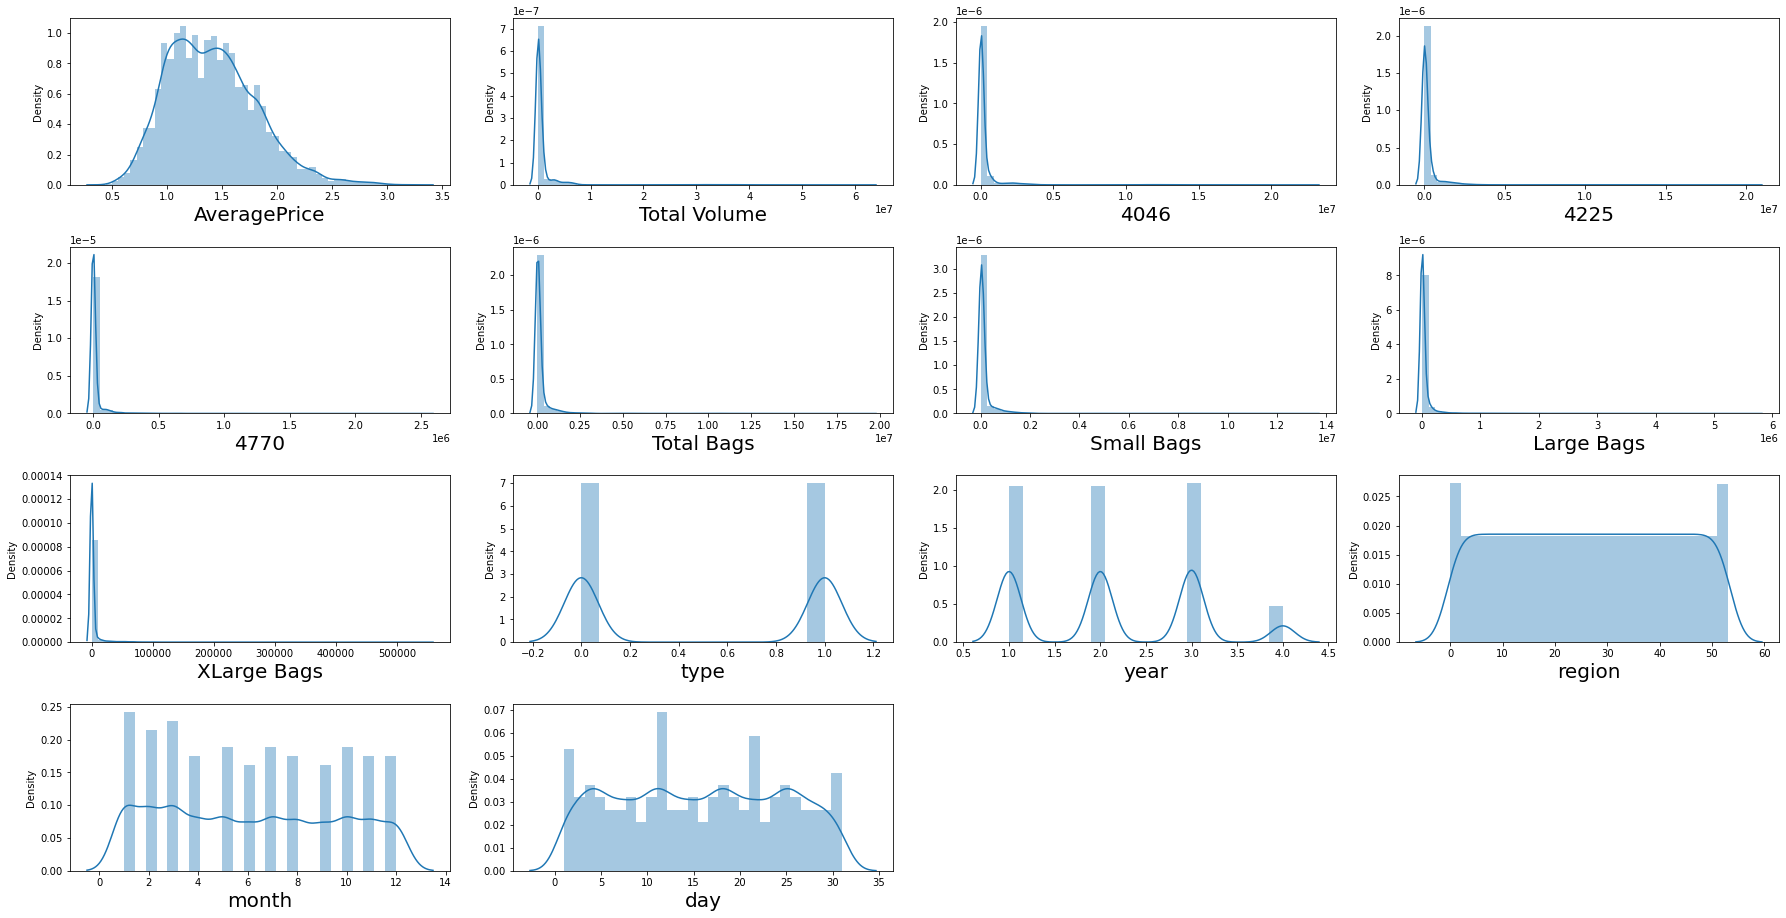

In [26]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in dfn:
    ax= plt.subplot(8,4,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

Skewness is reduced and continuous data is approaching normal distribution.

In [29]:
X = dfn.drop('AveragePrice', axis=1)
y = dfn['AveragePrice']
vif1 = pd.DataFrame()
Xsc = np.asarray(X)
vif1['score'] = [variance_inflation_factor(Xsc,i) for i in range (Xsc.shape[1])]
vif1['Feature'] = X.columns
vif1

,score,Feature
0,48.766329,Total Volume
1,6.753590,4046
2,10.769743,4225
3,3.575349,4770
4,33.760244,Total Bags
5,16.475907,Small Bags
6,3.409965,Large Bags
7,1.829221,XLarge Bags
8,4.287254,type
9,1.400954,year


Some Multicollinearity exists between some factors. We'll remove some factors upon analysis

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(31,'Score'))

    Feature name      Score
8           type  47.265440
0   Total Volume  37.198510
1           4046  33.822923
4     Total Bags  33.332846
3           4770  25.180366
5     Small Bags  22.865413
6     Large Bags  21.484751
2           4225  19.646060
7    XLarge Bags  13.540507
9           year   3.219752
11         month   2.855309
10        region   1.281176
12           day   1.274493


We'll remove some factors to reduce Multicollinearity

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 55)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
kn.fit(x_train, y_train)
rf.fit(x_train, y_train)
print(lr.score(x_test, y_test), dt.score(x_test, y_test), kn.score(x_test, y_test), rf.score(x_test, y_test))

0.5513601332988074 0.7473096909100303 0.8066677801857332 0.8877737315333252


RandomForest is the most accurate of all models. Reducing number of factors and checking.

In [32]:
X1 = X.drop(['year', 'month', 'region', 'day'], axis = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 55)
dt.fit(X1_train, y1_train)
lr.fit(X1_train, y1_train)
rf.fit(X1_train, y1_train)
kn.fit(X1_train, y1_train)
print(dt.score(X1_test,y1_test), lr.score(X1_test,y1_test), rf.score(X1_test,y1_test), kn.score(X1_test,y1_test))

0.5058332202687528 0.47939580898690093 0.7599295094209767 0.750228930253579


Data loss has reduced accuracy. Therefore, we will not remove the data

In [33]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
kn.fit(x_train, y_train)
rf.fit(x_train, y_train)
print(lr.score(x_test, y_test), dt.score(x_test, y_test), kn.score(x_test, y_test), rf.score(x_test, y_test))

0.5513601332988074 0.7408278611453685 0.8066677801857332 0.8860632022552992


Applying GridSearchCV on RF

In [38]:
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [150, 200, 250, 300],
          'max_depth': [13, 15, 17],
         'min_samples_split': [5, 10, 25],
         'min_samples_leaf': [5, 10, 25]}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print(grd.best_params_)

{'bootstrap': True, 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}


In [39]:
rfc = grd.best_estimator_
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.8691383961829385

There are no signs of overfitting. Saving the model 

In [40]:
filename = 'Avocado.pickle'
pickle.dump(rfc, open(filename, 'wb'))